In [1]:
# Comapres the Energy for the QHO Given by KS and TFW

In [2]:
# Imports Modules
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Define grid and Constants
xmax = 10.0 # Grid Size
Ng = 200 # Number of Grid Points
NnMax = 52 # Max Number of states (n = 0, 1, 2, ..., NnMax - 2)
Eks = np.zeros(NnMax, dtype=np.float64) # KS energies
Etf = np.zeros(NnMax, dtype=np.float64) # TF energies

LamParam = 1 # Parameter to modify Wiezsacker term

# Generates x axis of graph
xAxis = np.arange(0 , NnMax - 1 , 1.0)

In [3]:
# Finds total KS energy of the system

def KS_Func(xmax,Ng,Nn):
    import numpy as np
    import matplotlib.pyplot as plt


    
    # Define grid 
    x_g = np.linspace(-xmax, xmax, Ng) # Defines x-coords
    dx = x_g[1] - x_g[0] # Defines setp for change in x
    vext_g = 0.5 * x_g**2  # External potential

    T_gg = np.zeros((Ng, Ng))  # Kinetic operator
    for i in range(Ng):
        T_gg[i, i] = -2.0
        if i > 0:
            T_gg[i, i - 1] = 1.0
            T_gg[i - 1, i] = 1.0
    T_gg *= -0.5 / dx**2

    # Initialize density as even:
    n_g = 2.0 * Nn / (Ng * dx) * np.ones(Ng)

    # Nn states, each one doubly occupied.


    density_change_integral = 1.0
    while density_change_integral > 1e-6:
        # Calculate Hamiltonian
        veff_g = vext_g
        H_gg = T_gg + np.diag(veff_g)  # Hamiltonian

        # Solve KS equations
        eps_n, psi_gn = np.linalg.eigh(H_gg)

        # Normalize states (states are normalized, but not in our dx metric)
        psi_gn /= np.sqrt(dx)

        # Update density
        nold_g = n_g
        n_g = 2.0 * (psi_gn[:, :Nn]**2).sum(axis=1)
        density_change_integral = np.abs(nold_g - n_g).sum() * dx

        charge = n_g.sum() * dx
        #assert abs(charge - 2.0 * Nn) < 1e-14
        

        Eks = 2.0 * eps_n[:Nn].sum()  # Band structure energy
        Ekin = Eks - (veff_g * n_g).sum() * dx

        Epot = (vext_g * n_g).sum() * dx
        
        Etot = Ekin + Epot 
        
    # Plots Graph of Wave Functions of States
    #for i in range(Nn):
     #   plt.plot(x_g, psi_gn[:, i], label='n={}, e={:3f}'.format(i + 1, eps_n[i]))
      #  plt.legend(loc='lower right')
    #plt.show()
     
    # Plots Graph of electron density
    #plt.plot(x_g, n_g)
    #plt.show()
    
    # Prints and returns energies and electron density
    print('KS Energy', Ekin)
    return(Ekin, n_g)

In [23]:
# Finds Thomas Fermi-Energy

def TF_Solver(xmax, Ng, n_g, LamParam):
    
    import numpy as np
    from numpy import diff # For differentiation of rho 
    from numpy import trapz # To sum areas

        
    x_g = np.linspace(-xmax, xmax, Ng) # Defines x-coords
    dx = x_g[1] - x_g[0] # Defines setp for change in x

    vext_g = 0.5 * x_g**2 # External Potential (why 1/2?)

    
    # Calcultes Wiezsacker 1st order term
    dRho = np.gradient(n_g,dx)
    dRhoAbs = (abs(dRho))**2
    WiezList = (dRhoAbs / n_g).sum() * dx
    
    
    # Calculates second order Wiezsacker Term
    Rho2 = (abs(dRho))**3
    WiezList2 = (Rho2 / n_g).sum() * dx
    
    # Calculates third order Wiezsacker Term
    Rho3 = (abs(dRho))**4
    WiezList3 = (Rho3 / n_g).sum() * dx
    
    # Generates Thomas-Fermi Energy
    ETFint = (n_g**(5. / 3.)).sum() * dx
    ETF = ETFint * 2.871234
    
    
    # Generates Total potential
    Epot = (vext_g * n_g).sum() * dx
    
    # Calculates total kinetic energy
    Ekin = ETF + WiezList + WiezList2 + WiezList3


    # Adds kintic and potential energies
    Etot = Ekin + Epot

    
    # Prints and returns total energy
    print('TFW Energy', Ekin)
    return(Ekin)


In [25]:
# Runs code for each different number of states
for Nn in range(NnMax):
    if Nn == 0:
        print('No state')
    else:
        print('En = ',Nn - 1) # Prints number of energy level
        
        Eks[Nn], n_g = KS_Func(xmax, Ng, Nn) # Generates lst of KS energies
        Etf[Nn]= TF_Solver(xmax, Ng, n_g, LamParam) # Generates list of TF energies
    # End If
# End For

No state
En =  0
KS Energy 0.500000200026
TFW Energy 13.2907844926
En =  1
KS Energy 2.00000200484
TFW Energy 26.8682126697
En =  2
KS Energy 4.50000904245
TFW Energy 41.2418945962
En =  3
KS Energy 8.00002739359
TFW Energy 56.3280923284
En =  4
KS Energy 12.5000656231
TFW Energy 72.0497623862
En =  5
KS Energy 18.0001348117
TFW Energy 88.3456212579
En =  6
KS Energy 24.5002485887
TFW Energy 105.166707124
En =  7
KS Energy 32.0004231646
TFW Energy 122.473471794
En =  8
KS Energy 40.5006773648
TFW Energy 140.233055999
En =  9
KS Energy 50.0010326635
TFW Energy 158.417267114
En =  10
KS Energy 60.5015132183
TFW Energy 177.002470244
En =  11
KS Energy 72.0021459052
TFW Energy 195.968261736
En =  12
KS Energy 84.5029603544
TFW Energy 215.296011837
En =  13
KS Energy 98.0039889866
TFW Energy 234.970885287
En =  14
KS Energy 112.50526705
TFW Energy 254.9783456
En =  15
KS Energy 128.006832657
TFW Energy 275.304817509
En =  16
KS Energy 144.508726824
TFW Energy 295.93944007
En =  17
KS Energy

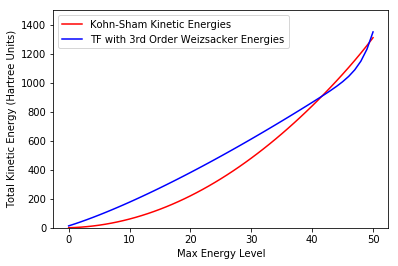

In [27]:
# Draws graph of energies
plt.plot(xAxis, Eks[1:], color='red', label = 'Kohn-Sham Kinetic Energies') # Plots KS energies
plt.plot(xAxis, Etf[1:], color='b', label = 'TF with 3rd Order Weizsacker Energies') # Plots TF energies
plt.legend(loc='upper left')
plt.xlabel('Max Energy Level')
plt.ylabel('Total Kinetic Energy (Hartree Units)')

axes = plt.gca()
axes.set_ylim([0,1500])
FileName = 'Weiz_3_{0}.png'.format(NnMax - 2)

plt.savefig(FileName)
plt.show()

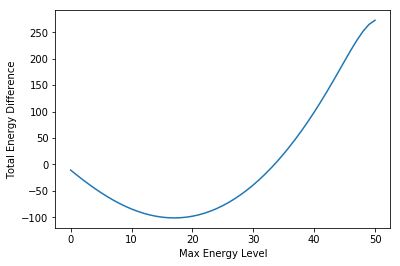

In [30]:
# Finds differecne between KS and TFW energies

Diff = np.zeros(NnMax, dtype=np.float64) # Initilises array
Diff = Eks - Etf # Finds difference at each number of states

plt.plot(xAxis, Diff[1:]) # Plots the difference between 
# Graph labels
plt.xlabel('Max Energy Level')
plt.ylabel('Total Energy Difference')

# Titles graph
Title2 = 'Difference between Kinetic Energies for {0} states'.format(NnMax - 2, LamParam)
#plt.title(Title2)

# Outputs graph to png
FileName = '3rd_Order_Diff_{0}.png'.format(NnMax - 2, LamParam)
plt.savefig(FileName)

plt.show()